<a href="https://colab.research.google.com/github/RandomForestRanger/first/blob/master/Seaborn_regplot_and_lmplot_transparent_cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# pip installing...

!pip install --upgrade -q gspread
!pip install gspread-dataframe

In [0]:
#import libraries
import numpy as np
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import seaborn as sns

In [0]:
#authorise node to access Gdrive via KDL
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
#link to pre-opened csv file in my gdrive 
data1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1kuxYx2Me-CyI9foNk_xlil8t5ghhCL178d1iCtFndMU/edit#gid=732145939')

In [0]:
#get the data as a worksheet  
ws = data1.worksheet('woer')

In [0]:
#convert the data to pandas dataframe (can include argument , header = None   if this is needed)
Woer = get_as_dataframe(ws)
#inspect data
Woer.tail()

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Unnamed: 29,Unnamed: 30
10315,1576916.0,SAF3,3.0,14-Jan-97,1997,1.0,Strategic development,Unidentified Armed Group (South Africa),NaN,3.0,...,30.8833,1.0,Reuters News,International,Defusal: A group of unknown men place a bomb i...,0.0,1.524054e+09,ZAF,NaN,NaN
10316,1576955.0,SAF2,2.0,09-Jan-97,1997,1.0,Riots/Protests,Protesters (South Africa),NUM: National Union of Mineworkers,6.0,...,27.2500,1.0,Reuters News,International,"The NUM, the mining union which the Rustenburg...",0.0,1.524054e+09,ZAF,NaN,NaN
10317,1977965.0,SAF1,1.0,05-Jan-97,1997,1.0,Remote violence,BAT: Boere Attack Troop,NaN,3.0,...,27.2500,1.0,Reuters News,International,"The Boere Attack Troop, a far right group, det...",4.0,1.542152e+09,ZAF,NaN,NaN
10318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#since g-sheets brings along a lot of empty/Nan cellumns or rows, this chops them out. Can replace "all" with "any" if I want to discard any incomplete collumns or rows
Woer.dropna(axis=1, how='all' ,inplace=True )
Woer.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
Woer.tail()

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
10313,1576757.0,SAF6,6.0,06-Feb-97,1997,1.0,Riots/Protests,Protesters (South Africa),NaN,6.0,...,Soweto,-26.2667,27.8667,1.0,Reuters News,International,A group of demonstrators blocked roadways in p...,4.0,1.524054e+09,ZAF
10314,1576784.0,SAF4,4.0,01-Feb-97,1997,2.0,Battle-No change of territory,Unidentified Armed Group (South Africa),NaN,3.0,...,Johannesburg,-26.2023,28.0436,1.0,Reuters News,International,A group of robbers steal 50 guns from a police...,0.0,1.524054e+09,ZAF
10315,1576916.0,SAF3,3.0,14-Jan-97,1997,1.0,Strategic development,Unidentified Armed Group (South Africa),NaN,3.0,...,Amanzimtoti,-30.0500,30.8833,1.0,Reuters News,International,Defusal: A group of unknown men place a bomb i...,0.0,1.524054e+09,ZAF
10316,1576955.0,SAF2,2.0,09-Jan-97,1997,1.0,Riots/Protests,Protesters (South Africa),NUM: National Union of Mineworkers,6.0,...,Rustenburg,-25.6667,27.2500,1.0,Reuters News,International,"The NUM, the mining union which the Rustenburg...",0.0,1.524054e+09,ZAF
10317,1977965.0,SAF1,1.0,05-Jan-97,1997,1.0,Remote violence,BAT: Boere Attack Troop,NaN,3.0,...,Rustenburg,-25.6667,27.2500,1.0,Reuters News,International,"The Boere Attack Troop, a far right group, det...",4.0,1.542152e+09,ZAF


In [0]:
sns.set_style("whitegrid", {'axes.grid' : False})

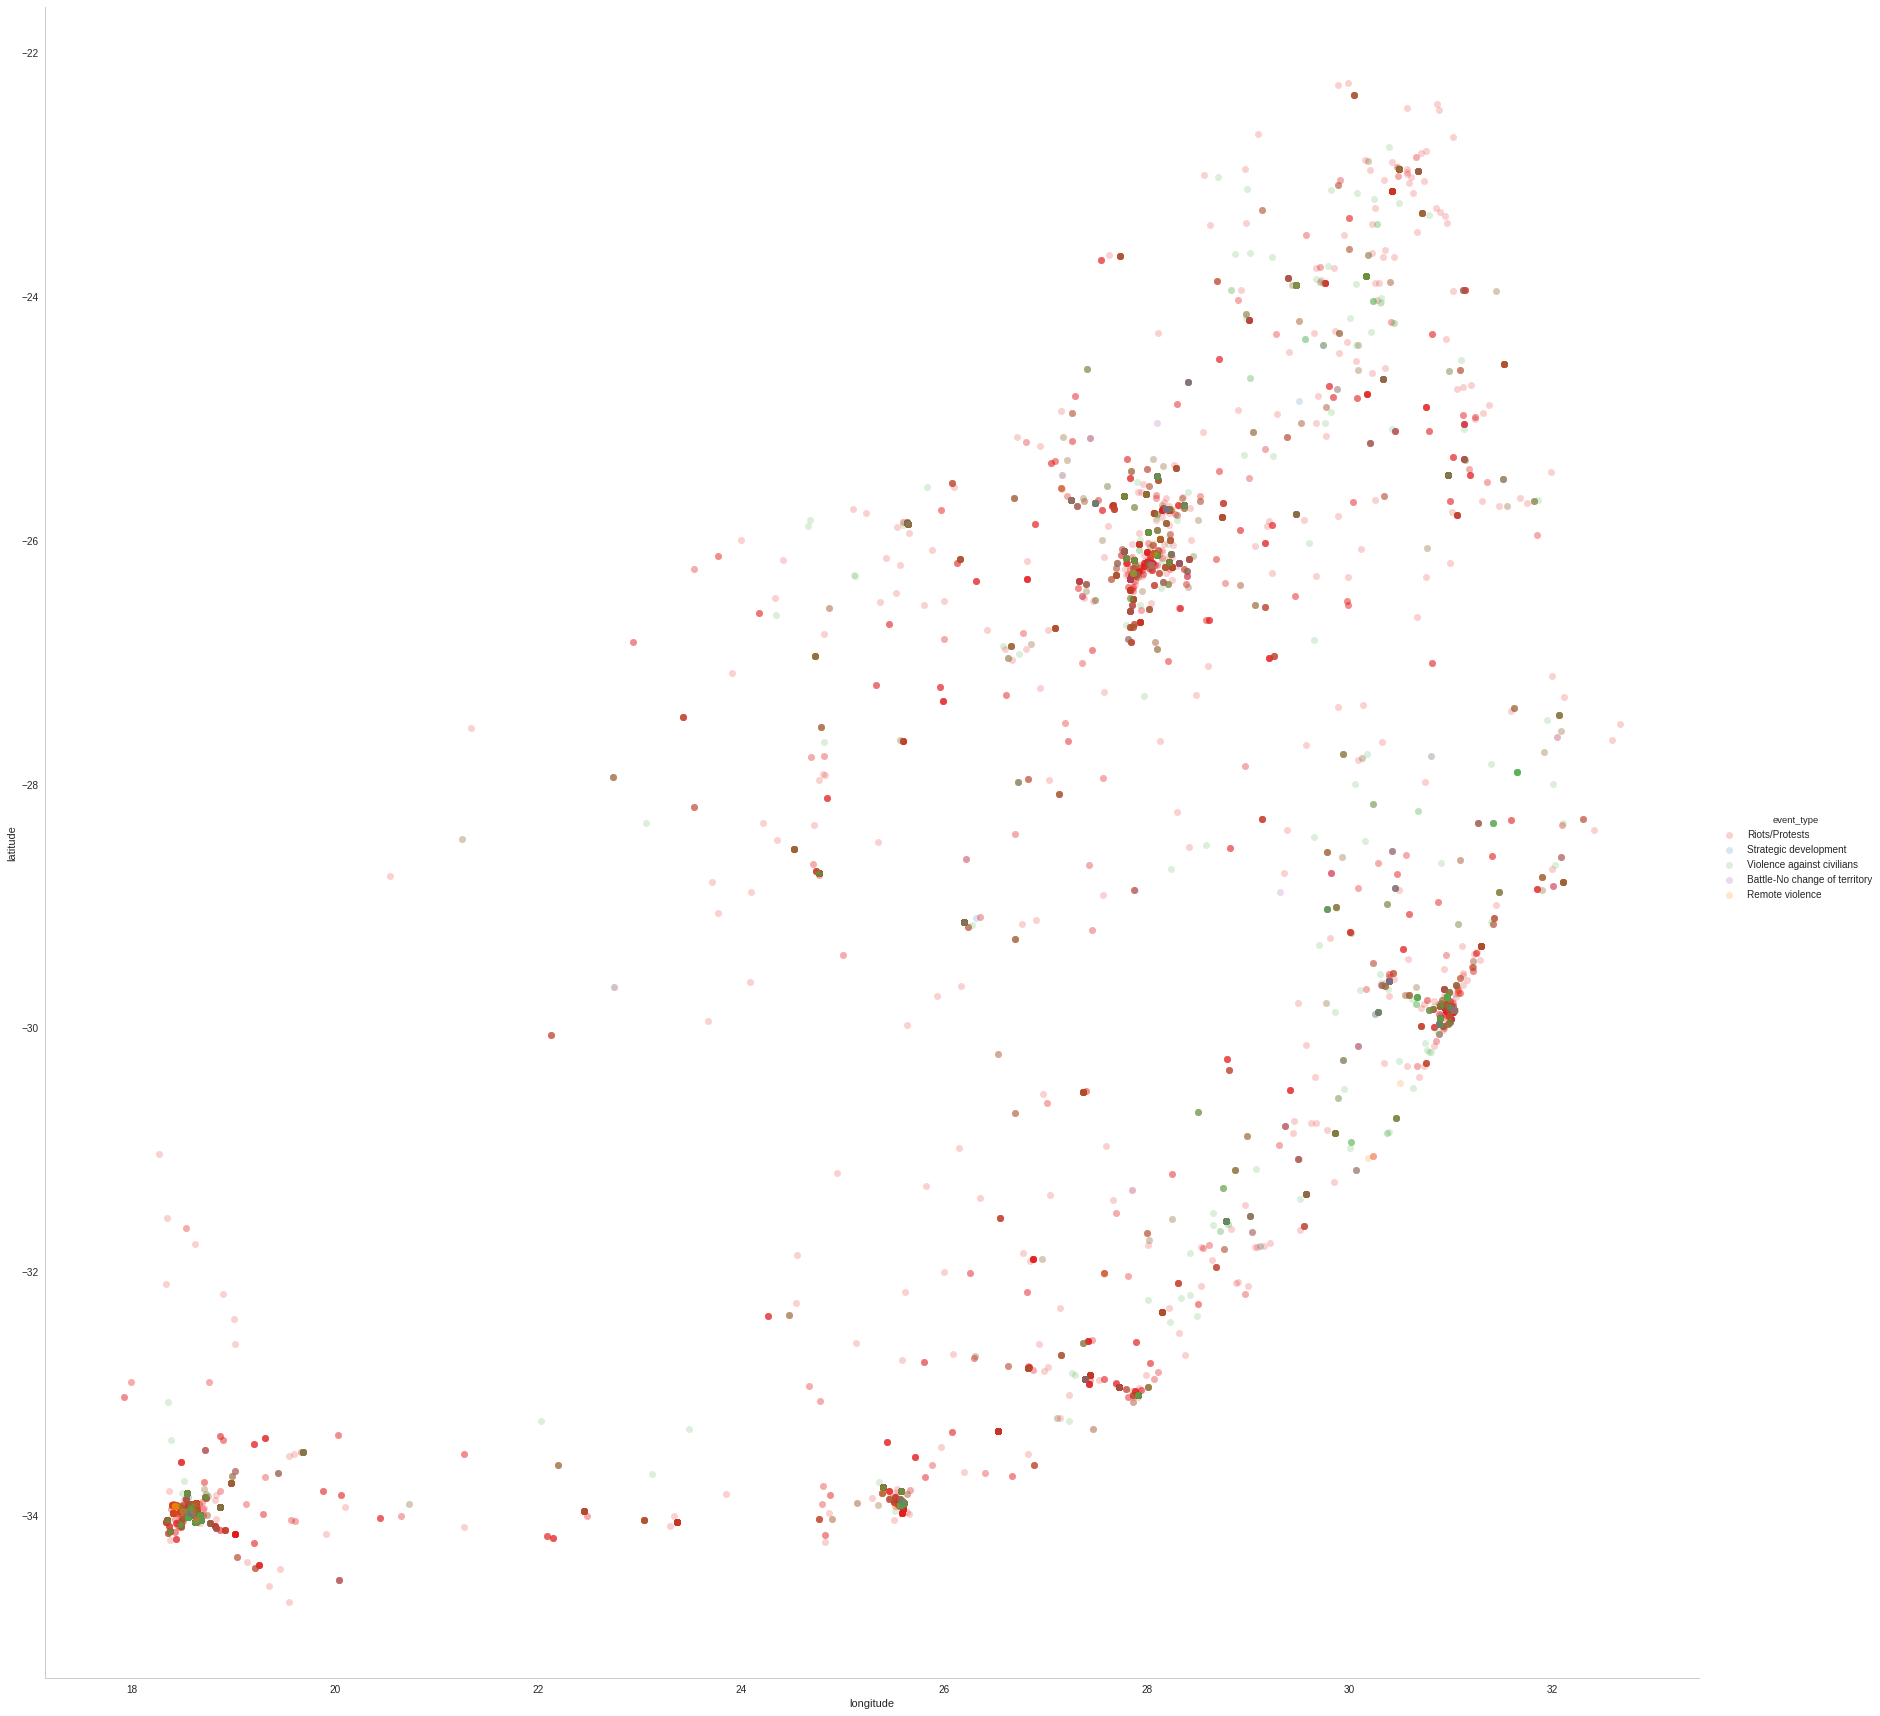

In [0]:
sns.lmplot(x='longitude', y='latitude', data = Woer, scatter_kws={'alpha':0.20}, fit_reg = False, size = 24, hue= "event_type", palette= 'Set1', aspect = 1)


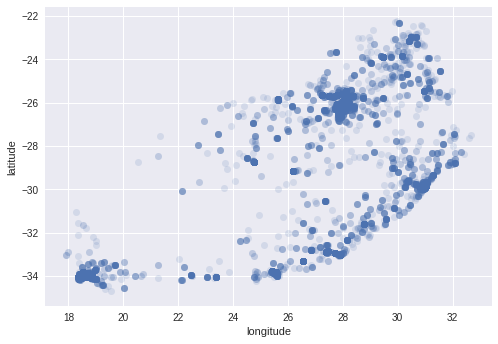

In [0]:
sns.regplot(x='longitude', y='latitude', data = Woer, scatter_kws={'alpha':0.15}, fit_reg = False, )